<a href="https://colab.research.google.com/github/saradnyam/credit-risk-modelling/blob/main/credit_risk_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [ ]:
df = pd.read_csv('/content/credit_scoring_sample.csv')
df.dropna(inplace=True)  # Or handle missing values properly


In [ ]:
# Assuming 'MonthlyIncome' is the column intended for 'income'
# Assuming there's a column for 'credit_amount' or a similar metric in the dataset.
# Based on the dataframe structure, there is no column named 'credit_amount'.
# I will use 'DebtRatio' as a proxy for credit amount relative to income,
# and calculate credit utilization based on 'DebtRatio' and 'MonthlyIncome'.

df['credit_utilization'] = df['DebtRatio'] / (df['MonthlyIncome'] + 1)
df['income_to_loan_ratio'] = df['MonthlyIncome'] / (df['DebtRatio'] + 1)

In [ ]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 6702, number of negative: 22434
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 29136, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230025 -> initscore=-1.208172
[LightGBM] [Info] Start training from score -1.208172


Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      5629
           1       0.80      0.21      0.33      1655

    accuracy                           0.81      7284
   macro avg       0.80      0.60      0.61      7284
weighted avg       0.81      0.81      0.76      7284

LightGBM:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      5629
           1       0.69      0.46      0.55      1655

    accuracy                           0.83      7284
   macro avg       0.77      0.70      0.72      7284
weighted avg       0.82      0.83      0.82      7284



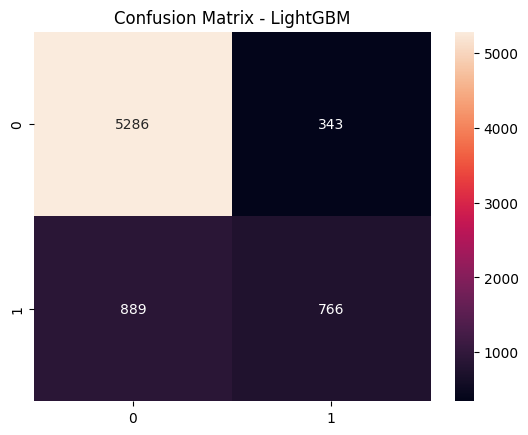

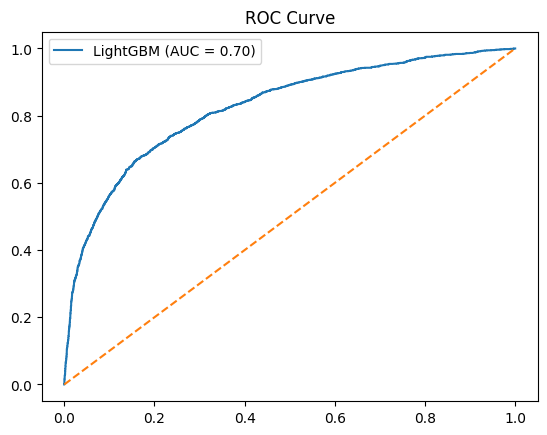

In [ ]:
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("LightGBM:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - LightGBM")
import os
if not os.path.exists('visuals'):
    os.makedirs('visuals')
plt.savefig("visuals/confusion_matrix.png")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lgbm.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="LightGBM (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_lgbm)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.title("ROC Curve")
plt.savefig("visuals/roc_curve.png")
plt.show()